# Ubrukte oppgaver

Dette er oppgaver som ikke kom med i den endelige oppgaven. Ønsker ikke å slette dem, da de kan brukes som fullgode oppgaver (etter litt arbeid) dersom det er ønskelig. 

Tasks that did not make the final cut. 

In [1]:
# Importerer alle moduler du kan få bruk for i løpet av øvinga her
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D

Vi skal se på et 2-dimensjonalt system. Da ser startverdien ut som følgende

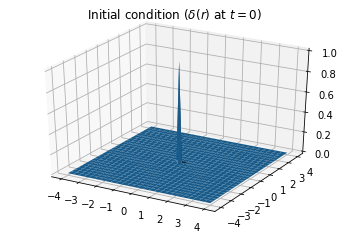

In [2]:
from scipy.signal import unit_impulse

L = 4 # E.g. length of x-axis.

points = 53
delta_xy = unit_impulse((points, points), idx="mid") # Plasserer 1.0 i midten av en 2d-liste
x = np.linspace(-L, L, points)
y = np.linspace(-L, L, points)

xv, yv = np.meshgrid(x,y)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xv, yv, delta_xy)
ax.set_title("Initial condition (" + r"$\delta (r)$" +r" at $t=0)$")
plt.show()

**c)** Lag et sett med subplots for ulike tider, på samme måte som i a). Her skal du derimot lage 3-dimensjonale overflate-plott, for å kunne visualisere det 2-dimensjonale systemet.

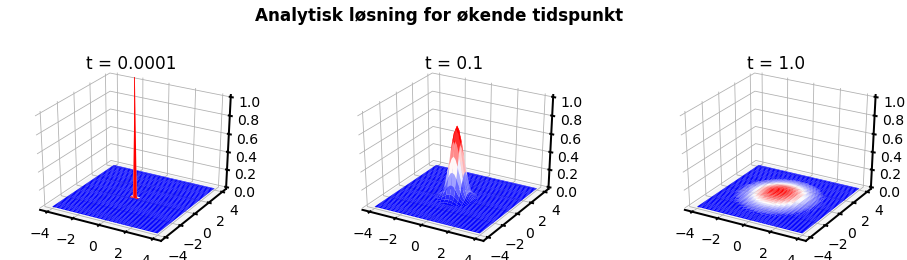

In [3]:
# Skriv koden din her.

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'out' 
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['axes.labelpad'] = 0.0 
mpl.rcParams['figure.titleweight'] = "bold"
mpl.rcParams['figure.subplot.top'] = 0.8 
mpl.rcParams['figure.subplot.wspace'] = 0.3 

def analytic_solution(r, t, dim = 1):
    """One possible analytic solution to the diffusion equation.
    
    The initial condition is a Dirac-Delta function at t=0.
    You have to specify the dimension you are working with.
    """
    D = 1 
    return (1/(4*np.pi*D*t))**(dim/2)*np.exp(-r**2/(4*D*t))
    

fig = plt.figure(figsize=plt.figaspect(1/4))

axs = []

timestamps = [0.0001, 0.1, 1.0] # E.g.

y = np.linspace(-L,L,100)
xv, yv = np.meshgrid(x,y)

for i in range(3):
    axs.append(fig.add_subplot(1, 3, i+1, projection='3d')) # Lager akser og legger til i listen.
    axs[i].xaxis.pane.fill = False # Tar bort grått panel ortogonalt på x-aksen.
    axs[i].xaxis.pane.set_edgecolor('white') # Setter kanten til hvit.
    axs[i].yaxis.pane.fill = False # Tar bort grått panel ortogonalt på t-aksen.
    axs[i].yaxis.pane.set_edgecolor('white') # Setter kanten til hvit.
    axs[i].set_title('t = {}'.format(timestamps[i]))
    sol = analytic_solution(np.sqrt(xv**2+yv**2),timestamps[i], dim = 2)
    sol = np.clip(sol, None, 1.3) # Tar bort verdier større enn 1.3 i sol. Gir bedre ratio i plotting.
    
    sol[np.abs(sol[:,:]) < 1e-2] = 0.0 # Gjør plottingen litt bedre for høyere tider kanskje? #(1!)
    # Kan være med for høyere tider! Se kommentar lenger nede. 
    
    axs[i].plot_surface(xv, yv, sol, cmap='bwr') # Plotter.

plt.setp(axs, zlim=(0,1)) # Setter felles zlim på alle subplottene.
    
fig.suptitle("Analytisk løsning for økende tidspunkt")

plt.show()

# Det eneste problemet her er at den ikke flater helt ut ved høyere tider? (se av fargene).
# Mulig løsning i linje kommentert ut ovenfor merket med (1!)
# Ser forskjellen med og uten denne linja når man setter opp tiden til for eksempel 10.0

**d)** Nå har vi puslet ganske mye med en gitt analytisk løsning av diffusjonsligningen. Hva hvis man ikke kjenner til løsningen? I denne øvingen skal vi ta i bruk en ligningsløser i Python. Senere i kurset skal du lære numeriske metoder innen lineær algebra for hvordan man kan løse slike parabolske partielle differensialligninger, ved å studere varmeledningsligningen. Foreløpig er det derimot tilstrekkelig å bruke kode som noen andre har laget for oss. 

I cellen nedenfor er det importert en modul med kode. Dette er et eksempel på en modul som kan brukes til vårt formål. Bruk modulen til å løse diffusjonsligningen for det systemet vi allerede har sett på. Plott de samme figurene som i de tidligere oppgavene, for å forsikre deg om at de ser like ut. Du kan prøve å plotte dem samtidig for å se om de overlapper, og plotte feilen mellom de to. Hva kan denne feilen eventuelt skyldes?

Dersom modulen ikke finnes på din maskin må du laste den ned. Dette kan gjøres via Python sin package installer pip. 

* UNIX/Linux/Mac: Åpne et terminalvindu (søk terminal i søkefeltet) og skriv kodelinja nedenfor.
* Windows: Åpne Anaconda Prompt og skriv kodelinja nedenfor.

```
pip install py-pde

```



In [ ]:
# Denne delen er ikke helt ferdig, men kan raskt gjøres om til en oppgave hvis ønskelig. 
import pde


grid = pde.CartesianGrid([[-L, L], [-L, L]], [points, points]) # generate grid, 2d. Can also specify z-axis
state = pde.ScalarField(grid, data=delta_xy)  # generate initial condition

eq = pde.DiffusionPDE(diffusivity=1) # define the pde
result = eq.solve(state, t_range=0.1) # solve the pde
result.plot() # Resultatet kan plottes med innebygget plotting i pde-modulen   

points = 53
x = np.linspace(-L, L, points)
y = np.linspace(-L, L, points)

xv, yv = np.meshgrid(x,y)

U = result.data # Kan også hente ut dataen fra result-objektet vha data metoden.

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xv, yv, U, cmap='bwr') 
#plt.setp(ax, zlim=(0,1)) # Setter zlim på plottet
ax.set_title("Initial condition (" + r"$\delta (r)$" +r" at $t=0)$")
plt.show()



Vi ser altså at modulen kan brukes til å løse diffusjonsligningen i situasjoner der vi ikke allerede vet løsningen. 

### Oppgave 2 - Random Walk

**1 dimensjon** 

Teori: 

Nå skal vi se på den mikroskopiske tilnærmingen til problemet. Random walk i 1 dimensjon kan beskrives av en modell som ser ut som følgende:

Partiklene beveger seg langs en rett linje på et gitter, med avstand $l$ mellom gitterpunktene. Partiklene kan kun bevege seg en avstand $l$ (diskret) og kan kun leve på et gitterpunkt (ikke mellom to gitterpunkter). Sannsynligheten $P_N(R)$ for at partikkelen har beveget seg $R$ steg til høyre etter $N$ steg er gitt ved

$$
    P_N(R) = p^R {(1-p)}^{(N-R)} \frac{N!}{R!(N-R)!}, 
$$

der $p$ er sannsynligheten for å hoppe et steg til høyre og $R$ er antall steg til høyre. Dersom vi antar uniform sannsynlighet er $p = (1-p) = \frac{1}{2}$ og uttrykket er gitt ved 

$$
    P_N(R) = \left(\frac{1}{2}\right)^N \frac{N!}{R!(N-R)!}.
$$

Nå innfører vi en posisjon langs x-aksen for partikkelen etter $R$ steg til høyre og $N-R$ steg til venstre

$$
    x = (R-(N-R)) \cdot l = (2R+N) \cdot l = m \cdot l. 
$$

$P_N(R)$ kan omformes til en funksjon av avstanden $P_N(m)$, som gir

$$
    P_N(m) = \left(\frac{1}{2}\right)^N \frac{N!}{\left(\frac{N+m}{2} \right)!\left(\frac {N-m}{2} \right)!}.
$$
Hvilken fordeling minner dette om fra sannsynlighetsregning? 

**a)** Plott fordelingen til $P_N(m)$ for ulike verdier av $m$ og $N$. Hva slags funksjon ser dette ut som? Hvordan ender funksjonen seg for ulike verdier av $m$ og $N$? Her kan du lage subplots over ulike verdier også. 

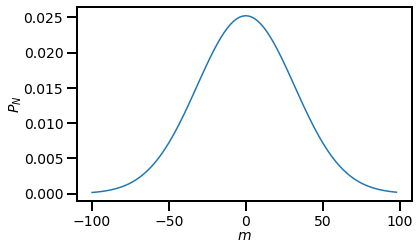

In [4]:
from math import factorial #Kan brukes til å regne ut fakultet. Spørsmål? Bruk help()-funksjonen.

# Skriv koden din her.


def P_N(m, N):
    ''' Den definerte sannsynligheten mhp m fra avsnittet ovenfor '''
    return (0.5)**N*(factorial(N)/(factorial((N+m)/2)*factorial((N-m)/2)))
  
#Vær obs på at factorial() ikke er definert for negative verdier når du velger range til m og verdien til N
m = np.arange(-100, 100, 2)
N = 1000
y = []


for i in m:
    y.append(P_N(i, N)) 

plt.plot(m,y)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_N$')
plt.show()


For store N kan vi bruke Strilings formel til å forenkle $P_N(m)$. Stirlings formel er

$$
    N! = \sqrt{2\pi N}\exp{(N\ln(N)-N)}.
$$

Denne kan settes inn i $P_N(m)$ slik at den, med litt massasje, blir

$$
    P_N(m) \approx \sqrt{\frac{2}{\pi N}}\exp \left(-\frac{m^2}{2N}\right), 
$$

der det er brukt at $N >> 1$, $\frac{m}{N} << 1$ og rekkeutviklingen til $\ln(1+x) \approx x$. 

**b)** Sett inn Stirlings formel i $P_N(m)$ og vis at man kommer fram til uttrykket ovenfor (dette kam ev. vises i LF, eller i forelesning)


Men hvordan kan dette relateres til makroskopisk diffusjon? 

$P_N(m)$ er sannsynligheten for å finne en partikkel i et helt bestemt punkt langs x-aksen, gitt av parameteren $m$ etter $N$ steg. Sannsynligheten $\widetilde{P_N(x)}\Delta x$ for å finne partikkelen i et makroskopisk intervall $(x, x+\Delta x)$ etter N steg er

$$
    \widetilde{P_N(x)}\Delta x = \sum_{m \in (x, x+\Delta x)} P_N(m).
$$

Vi definerer makroskopisk tid som $t = N t_c$, der $t_c$ er tiden mellom hver kollisjon (karakteristisk tid mellom hvert hopp). 

Det samme kan gjøres i 2 eller flere dimensjoner. Da må man derimot bruke metoder for å senke kjøretiden, da simuleringene krever mer og mer effektiv kode når man øker antall dimensjoner.

Random walk-tilnærmingen og tilnærmingen via diffusjonsligningen vil være mer og mer like jo flere partikler man bruker og jo kortere steglengde man bruker. Vi har derimot begrenset med datakraft, så disse eksemplene må dessverre holde som illustrasjon.

#### Hva sitter vi igjen med fra denne øvingen? 

En analogi til dette kan være den kvantemekaniske harmoniske oscillatoren sammenlignet med den klassiske harmoniske oscillatoren. Ved økende energier er sannsynligheten i den klassiske oscillatoren tilnærmet middelverdien til sannsynligheten i den kvantemekaniske oscillatoren ($|\Psi|^2$). Dette er dermed enda et eksempel på hvordan makroskopiske fenomener kan beskrives ved å se på mikroskopiske fenomener. Dette setter fenomenet litt i sammenheng kanskje. 